# Análise Bivariada e Multivariada das features de desempenho acadêmico e frequência escolar

Este grupo de variáveis analisa o risco acadêmico associado ao desempenho e à frequência escolar dos estudantes. .<br>
As features escolhidas são:
- failures: Número de reprovações anteriores.<br>
- absences: Número de faltas escolares.<br>
- G1: Nota obtida no primeiro período.<br>
- G2: Nota obtida no segundo período.<br>
- G3: Nota final do ano letivo.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d1_trabalhado = pd.read_csv("d1_trabalhado.csv", sep=",")

In [2]:
d1_features_perf_freq = ['failures', 'absences', 'G1', 'G2', 'G3']

## Analisando em relação à G3

In [14]:
# usando correlação de Pearson
correlation_matrix_pearson = d1_trabalhado[d1_features_perf_freq].corr()
correlation_with_g3 = correlation_matrix_pearson['G3'].sort_values(ascending=False)

print(correlation_with_g3)

G3          1.000000
G2          0.904868
G1          0.801468
absences    0.034247
failures   -0.360415
Name: G3, dtype: float64


In [15]:
# usando correlação de Spearman
correlation_matrix_spearman = d1_trabalhado[d1_features_perf_freq].corr(method='spearman')
correlation_with_g3_spearman = correlation_matrix_spearman['G3'].sort_values(ascending=False)

print(correlation_with_g3_spearman)

G3          1.000000
G2          0.957125
G1          0.878001
absences    0.017731
failures   -0.361224
Name: G3, dtype: float64


Conclusão:
Podemos observar que failures é a feature mais relevante de todo o dataset, depois dos subtargets. Estamos analisando em relação ao nível de correlação focado em G3. Absences, por outro lado, como observaremos a seguir, não tem tanta influência pois muitos alunos que tem absences em 0, ao que tudo indica, abandonaram o ano escolar.

## Analisando os subtargets

#### G1

In [5]:
correlation_with_g1 = correlation_matrix_pearson['G1'].sort_values(ascending=False)
print(correlation_with_g1)

G1          1.000000
G2          0.852118
G3          0.801468
absences   -0.031003
failures   -0.354718
Name: G1, dtype: float64


In [6]:
correlation_with_g1_spearman = correlation_matrix_spearman['G1'].sort_values(ascending=False)
print(correlation_with_g1_spearman)

G1          1.000000
G2          0.894792
G3          0.878001
absences    0.004479
failures   -0.346052
Name: G1, dtype: float64


Conclusão: <br>
Em G1 a situação é a mesma em relação à G3.

#### G2

In [7]:
correlation_with_g2 = correlation_matrix_pearson['G2'].sort_values(ascending=False)
print(correlation_with_g2)

G2          1.000000
G3          0.904868
G1          0.852118
absences   -0.031777
failures   -0.355896
Name: G2, dtype: float64


In [8]:
correlation_with_g2_spearman = correlation_matrix_spearman['G2'].sort_values(ascending=False)
print(correlation_with_g2_spearman)

G2          1.000000
G3          0.957125
G1          0.894792
absences   -0.033600
failures   -0.362357
Name: G2, dtype: float64


Conclusão:<br>
Em G2 a situação é a mesma em relação à G3.

## Analisando absences 

##### Correlações de absences

In [16]:
correlation_geral_pearson = d1_trabalhado.corr()
correlation_geral_absences = correlation_geral_pearson['absences'].sort_values(ascending=False)

filtered_correlations = correlation_geral_absences[(correlation_geral_absences > 0.12) | (correlation_geral_absences < -0.12)]

print(filtered_correlations)

absences          1.000000
age               0.175230
romantic          0.153384
guardian_other    0.140826
Walc              0.136291
Pstatus          -0.134937
reason_course    -0.165450
Name: absences, dtype: float64


#### Gráficos e análises que indicam abandono do ano escolar:
Explicação: há muitos dados de alunos que tiraram 0 em G3 e, ao mesmo tempo, têm 0 de faltas/absences. Isso pode indicar abandono escolar.

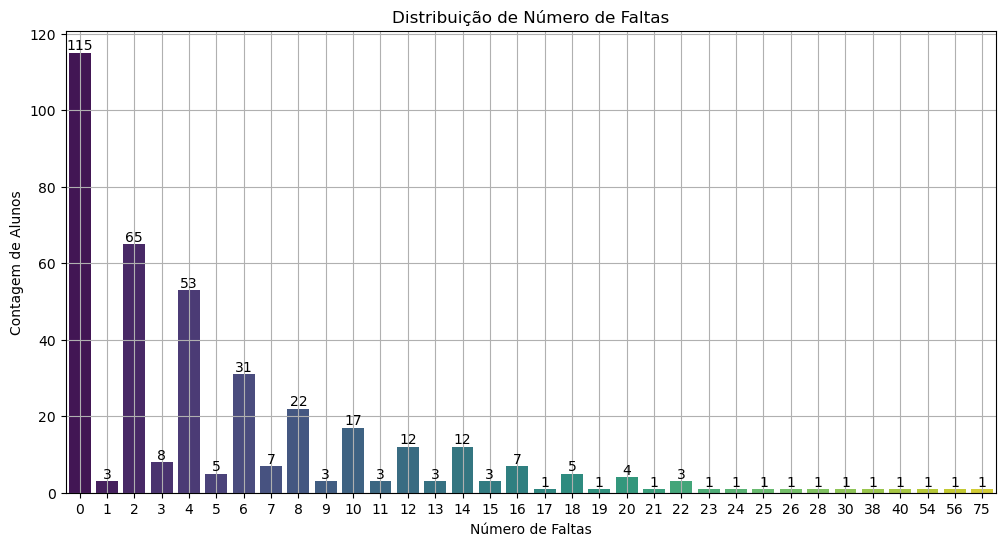

In [3]:
count_data = d1_trabalhado['absences'].value_counts().reset_index()
count_data.columns = ['absences', 'count']
count_data = count_data.sort_values('absences')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=count_data, x='absences', y='count', palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribuição de Número de Faltas')
plt.xlabel('Número de Faltas')
plt.ylabel('Contagem de Alunos')
plt.grid(True)
plt.show()

In [4]:
# Filtrando os dados com G3 igual a 0 e absences igual a 0
g3_absences_zerados = d1_trabalhado[(d1_trabalhado['G3'] == 0) & (d1_trabalhado['absences'] == 0)]
count_zerados = len(g3_absences_zerados)

print(count_zerados)

38


In [5]:
# Filtrando somente os alunos que tiveram 0 em G3
g3_zerados = d1_trabalhado[(d1_trabalhado['G3'] == 0)]
print(len(g3_zerados))

38


In [6]:
# Filtrando para ver se existem alunos que tiveram 0 em G2, mas, por algum motivo, obtiveram nota em G3.
g3_maior_que_0_g2_zerado = d1_trabalhado.query("G3 > 0 & G2 == 0")
print(g3_maior_que_0_g2_zerado)

Empty DataFrame
Columns: [sex, age, address, famsize, Pstatus, Medu, Fedu, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, Mjob_at_home, Mjob_health, Mjob_other, Mjob_services, Mjob_teacher, Fjob_at_home, Fjob_health, Fjob_other, Fjob_services, Fjob_teacher, reason_course, reason_home, reason_other, reason_reputation, guardian_father, guardian_mother, guardian_other]
Index: []

[0 rows x 45 columns]


> No total, temos 38 alunos que tiveram 0 em absences e 0 em G3, o que é algo incomum. Ao mesmo tempo, todos os alunos que obtiveram 0 em G2, também obtiveram 0 em G3, o que faz sentido. Vamos explorar mais.

In [7]:
g3_absences_zerados.loc[:, ['G3', 'G2', 'G1', 'failures', 'absences']]

,G3,G2,G1,failures,absences
128,0,4,7,2,0
130,0,0,12,2,0
131,0,0,8,0,0
134,0,0,9,0,0
135,0,0,11,0,0
136,0,0,10,0,0
137,0,0,4,2,0
140,0,9,7,0,0
144,0,0,5,3,0
146,0,7,6,3,0


In [8]:
# criando uma nova coluna chamada dropout, indicando os alunos que abandonaram a escola (G3 == 0  e absences == 0)
d1_trabalhado['dropout'] = ((d1_trabalhado['G3'] == 0) & (d1_trabalhado['absences'] == 0)).astype(int)
d1_trabalhado.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,dropout
0,1,18,1,1,0,4,4,2,2,0,...,0,1,1,0,0,0,0,1,0,0
1,1,17,1,1,1,1,1,1,2,0,...,0,0,1,0,0,0,1,0,0,0
2,1,15,1,0,1,1,1,1,2,3,...,0,0,0,0,1,0,0,1,0,0
3,1,15,1,1,1,4,2,1,3,0,...,1,0,0,1,0,0,0,1,0,0
4,1,16,1,1,1,3,3,1,2,0,...,0,0,0,1,0,0,1,0,0,0


In [9]:
d1_trabalhado.dropout.value_counts()

dropout
0    357
1     38
Name: count, dtype: int64

In [10]:
d1_trabalhado.to_csv("d1_trabalhadoDrop.csv", sep=",", index=False)

## Analisando dropout

In [50]:
correlation_geral_pearson = d1_trabalhado.corr()
correlation_geral_dropout = correlation_geral_pearson['dropout'].sort_values(ascending=False)

filtered_correlations = correlation_geral_dropout[(correlation_geral_dropout > 0.12) | (correlation_geral_dropout < -0.12)]

print(filtered_correlations)

dropout     1.000000
failures    0.257801
romantic    0.132894
Medu       -0.129380
higher     -0.159613
paid       -0.162195
absences   -0.233023
G1         -0.332904
G2         -0.525938
G3         -0.742631
Name: dropout, dtype: float64


In [52]:
correlation_matrix_spearman = d1_trabalhado.corr(method='spearman')
correlation_spearman_dropout = correlation_matrix_spearman['dropout'].sort_values(ascending=False)

filtered_correlations = correlation_spearman_dropout[(correlation_spearman_dropout > 0.12) | (correlation_spearman_dropout < -0.12)]

print(filtered_correlations)

dropout     1.000000
failures    0.260696
romantic    0.132894
Medu       -0.134218
higher     -0.159613
paid       -0.162195
G1         -0.345429
absences   -0.407215
G2         -0.430373
G3         -0.512874
Name: dropout, dtype: float64


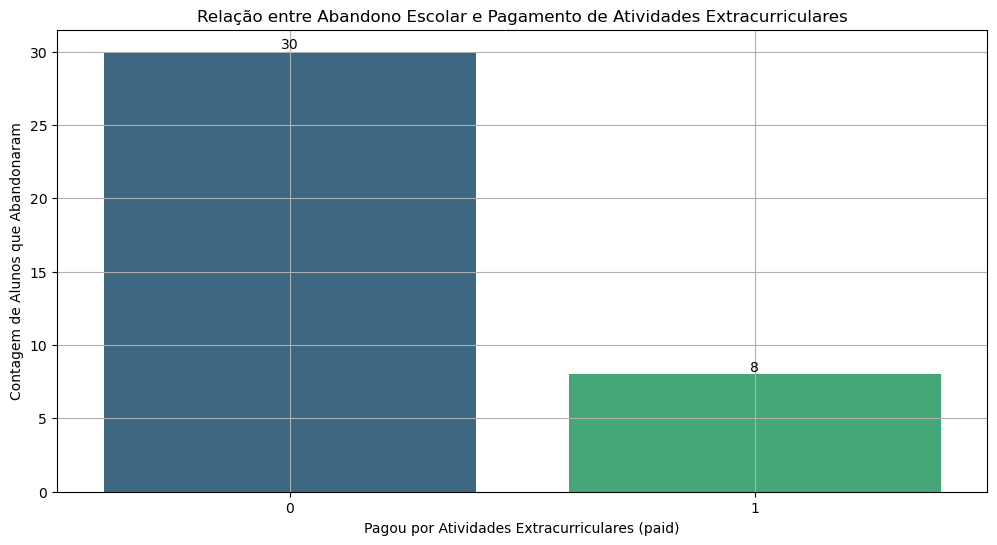

In [62]:
dropout_paid_data = d1_trabalhado[d1_trabalhado['dropout'] == 1].groupby('paid').size().reset_index(name='count')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dropout_paid_data, x='paid', y='count', palette='viridis')

# Adicionar contadores acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Relação entre Abandono Escolar e Pagamento de Atividades Extracurriculares')
plt.xlabel('Pagou por Atividades Extracurriculares (paid)')
plt.ylabel('Contagem de Alunos que Abandonaram')
plt.grid(True)
plt.show()

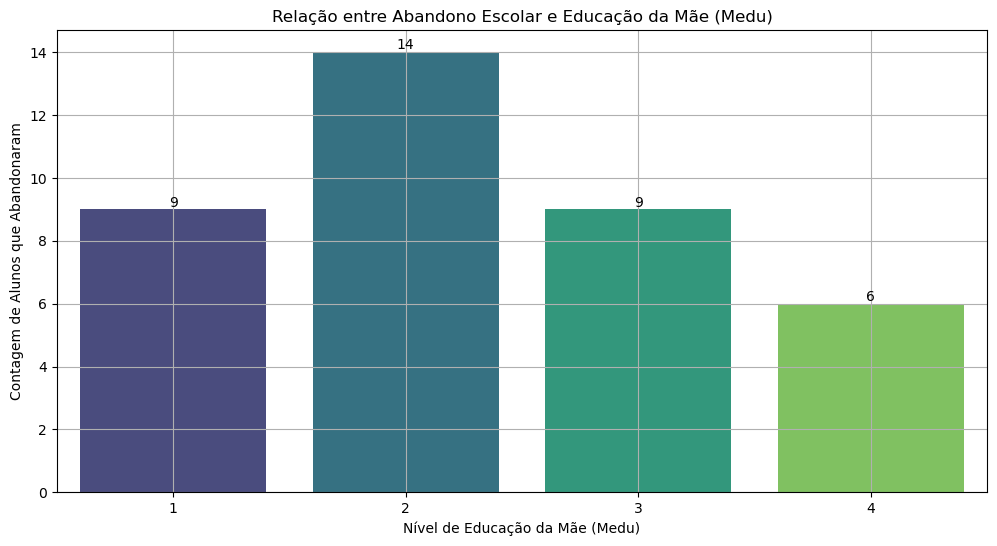

In [61]:
# relacionando Medu e dropout
dropout_data = d1_trabalhado[d1_trabalhado['dropout'] == 1].groupby('Medu').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dropout_data, x='Medu', y='count', palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Relação entre Abandono Escolar e Educação da Mãe (Medu)')
plt.xlabel('Nível de Educação da Mãe (Medu)')
plt.ylabel('Contagem de Alunos que Abandonaram')
plt.grid(True)
plt.show()

## Analisando failures

In [33]:
correlation_geral_pearson = d1_trabalhado.corr()
correlation_geral_failures = correlation_geral_pearson['failures'].sort_values(ascending=False)

filtered_correlations = correlation_geral_failures[(correlation_geral_failures > 0.12) | (correlation_geral_failures < -0.12)]

print(filtered_correlations)

failures           1.000000
guardian_other     0.291157
age                0.243665
Walc               0.141962
Dalc               0.136047
goout              0.124561
guardian_mother   -0.134498
Mjob_teacher      -0.157771
studytime         -0.173563
paid              -0.188039
Medu              -0.236680
Fedu              -0.250408
higher            -0.300316
G1                -0.354718
G2                -0.355896
G3                -0.360415
Name: failures, dtype: float64


In [34]:
correlation_geral_spearman = d1_trabalhado.corr(method='spearman')
correlation_geral_failures_spearman = correlation_geral_spearman['failures'].sort_values(ascending=False)

filtered_correlations_spearman = correlation_geral_failures_spearman[(correlation_geral_failures_spearman > 0.12) | (correlation_geral_failures_spearman < -0.12)]

print(filtered_correlations_spearman)

failures           1.000000
guardian_other     0.327187
age                0.236464
Dalc               0.187492
Walc               0.127912
studytime         -0.157633
Mjob_teacher      -0.164534
guardian_mother   -0.185651
paid              -0.200338
Fedu              -0.236616
Medu              -0.242373
higher            -0.264547
G1                -0.346052
G3                -0.361224
G2                -0.362357
Name: failures, dtype: float64


##### Observando mais de perto a correlação entre failures e G3

In [6]:
alunos_com_failures = d1_trabalhado.query("failures >= 1")
len(alunos_com_failures)

# 83 alunos que têm failures anteriores

83

Text(0.5, 1.0, 'Distribuição de G3 em alunos com failures')

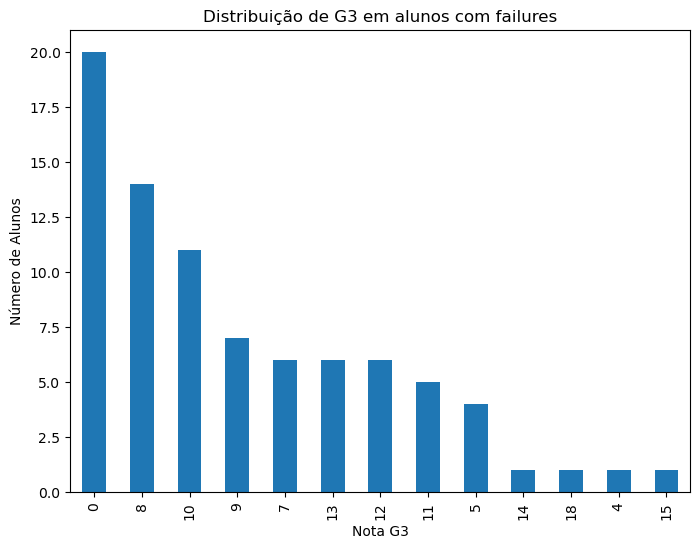

In [24]:
distribuicao_notas = alunos_com_failures.G3.value_counts()
plt.figure(figsize=(8, 6))
distribuicao_notas.plot(kind='bar')
plt.ylabel('Número de Alunos')
plt.xlabel('Nota G3')
plt.title('Distribuição de G3 em alunos com failures')

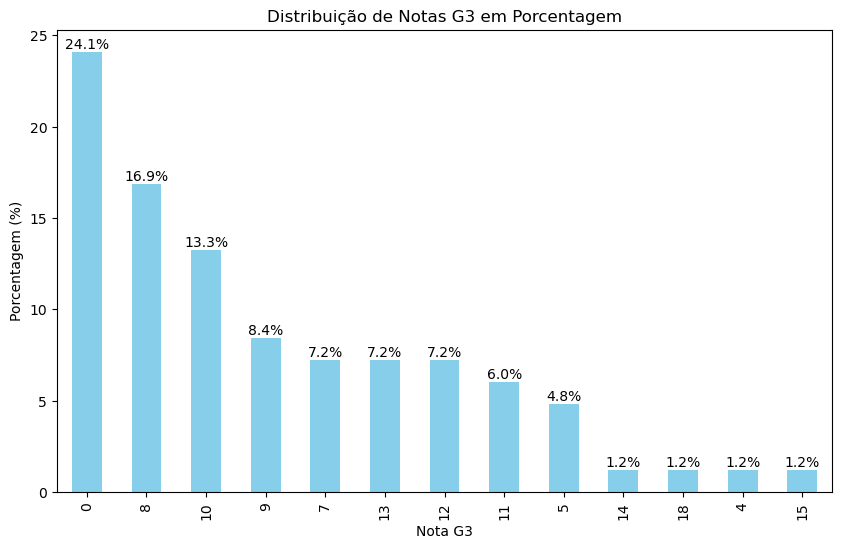

In [25]:
distribuicao_notas = alunos_com_failures.G3.value_counts(normalize=True) * 100

# Plotar as porcentagens
plt.figure(figsize=(10, 6))
distribuicao_notas.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Notas G3 em Porcentagem')
plt.xlabel('Nota G3')
plt.ylabel('Porcentagem (%)')

# Exibir os valores em cima das barras
for index, value in enumerate(distribuicao_notas):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

- Há 24.1% de alunos com failures que obtiveram 0 em G3. É uma porcentagem considerável. <br>
- Há 38.5% de alunos com failures que obtiveram notas baixas (menores do que 10). <br>
- No total, mais da metade dos estudantes com failures (62.6%) obtiveram notas abaixo de 10.


##### Explorando mais a correlação entre failures e as outras variáveis

Vimos que as features que mais possuem correlação positiva e negativa com failures são:
guardian_other     0.327187
age                0.236464
Dalc               0.187492
Walc               0.127912
studytime         -0.157633
Mjob_teacher      -0.164534
guardian_mother   -0.185651
paid              -0.200338
Fedu              -0.236616
Medu              -0.242373
higher            -0.264547

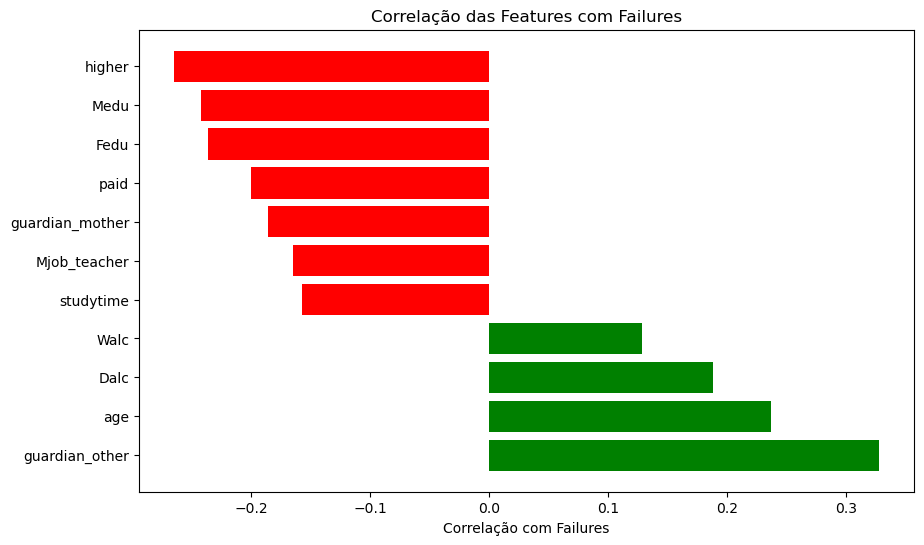

In [38]:
correlações_com_failures = {
    'guardian_other': 0.327187,
    'age': 0.236464,
    'Dalc': 0.187492,
    'Walc': 0.127912,
    'studytime': -0.157633,
    'Mjob_teacher': -0.164534,
    'guardian_mother': -0.185651,
    'paid': -0.200338,
    'Fedu': -0.236616,
    'Medu': -0.242373,
    'higher': -0.264547
}

plt.figure(figsize=(10, 6))
plt.barh(list(correlações_com_failures.keys()), correlações_com_failures.values(), color=['green' if x > 0 else 'red' for x in correlações_com_failures.values()])
plt.xlabel('Correlação com Failures')
plt.title('Correlação das Features com Failures')
plt.show()

Observamos que depois de guardian_other, age, higher, Medu e Fedu são as variáveis mais relevantes em failures. Como vimos na análise 04, higher tem relação com studytime, que também está um pouco baixo entre os estudantes com guardian_other, e também têm relação com o nível superior dos pais. 

In [35]:
# correlações de guardian_other
correlation_geral_g_other_spearman = correlation_geral_spearman['guardian_other'].sort_values(ascending=False)

filtered_correlations_spearman = correlation_geral_g_other_spearman[(correlation_geral_g_other_spearman > 0.12) | (correlation_geral_g_other_spearman < -0.12)]

print(filtered_correlations_spearman)

guardian_other     1.000000
age                0.332387
failures           0.327187
absences           0.131318
romantic           0.124045
guardian_father   -0.161285
nursery           -0.170929
guardian_mother   -0.444143
Name: guardian_other, dtype: float64


No geral, observamos que failures tem uma correlação positiva signiticativa com guardian_other. Por sua vez, guardian_other tem correlação positiva moderada com age e correlação negativa moderada com nursery, indicando que o aluno com guardian_other foi menos à creche/berçário/nursery.

## Criando pairplot de G3

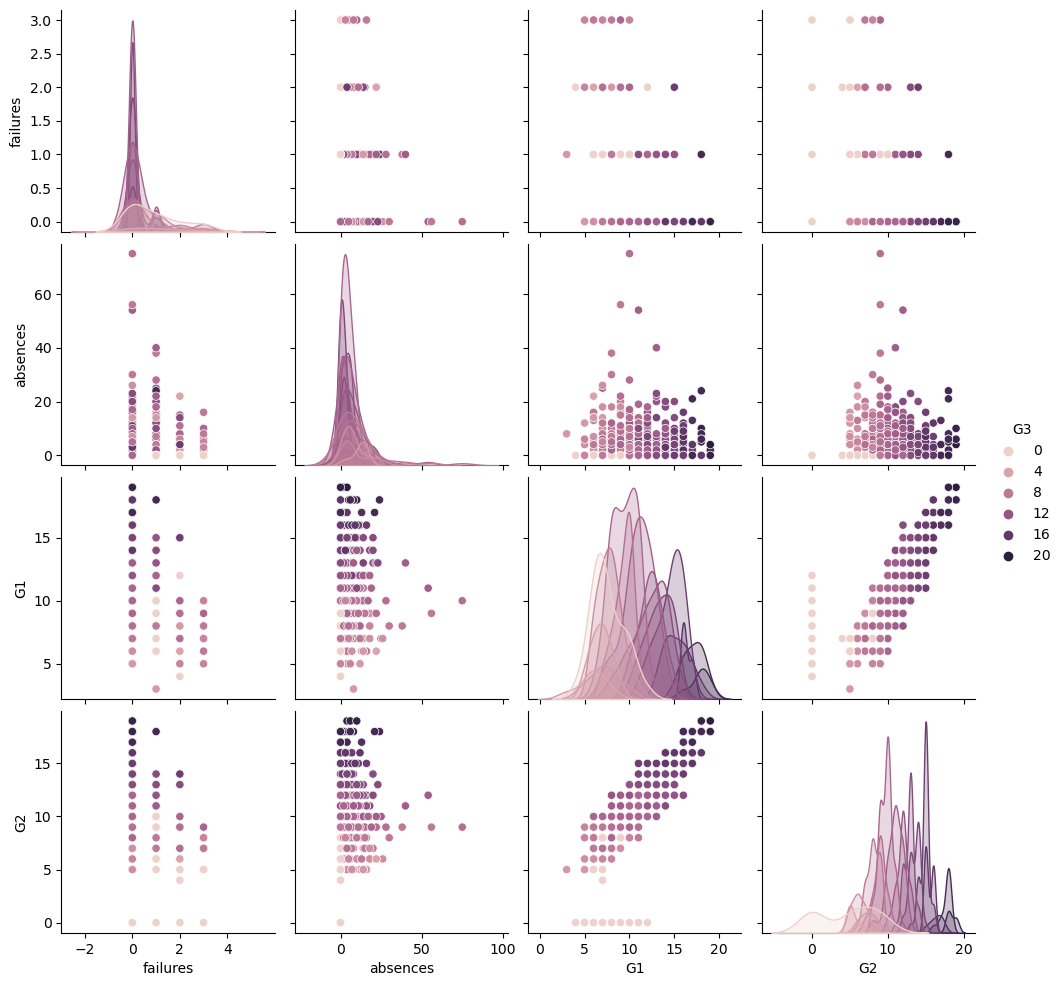

In [5]:
sns.pairplot(d1_trabalhado[d1_features_perf_freq],hue='G3')